<a href="https://colab.research.google.com/github/oxanaRC/CE902/blob/main/NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

10.08.21
Upload three csv files:
1. dataset for training and testing 
2. dataset for validation
3. dataset for records identification ('location key', 'postal code' and 'district) - this to be joined with data after predictions were done so the quality of predictions could be analysed by location.



In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))


Saving train_and_test_data.csv to train_and_test_data.csv
Saving locations_categorical_features.csv to locations_categorical_features.csv
Saving validation_data.csv to validation_data.csv
User uploaded file "train_and_test_data.csv" with length 138911868 bytes
User uploaded file "locations_categorical_features.csv" with length 27802193 bytes
User uploaded file "validation_data.csv" with length 4745908 bytes


In [2]:
import pandas as pd
from pathlib import Path

In [3]:
df_location_categories = pd.read_csv("locations_categorical_features.csv") 
df_location_categories

,location_key,postcode,district
0,100000460_235813700_173697830,IP28 6QS,ST EDMUNDSBURY
1,100000900_306645770_193413260,PO2 9AE,PORTSMOUTH
2,100001709_306232250_192988720,PO2 8NT,PORTSMOUTH
3,100002450_241021470_178393000,IP33 3UF,ST EDMUNDSBURY
4,100002500_240933210_178314290,IP33 3UE,ST EDMUNDSBURY
...,...,...,...
562389,99996800_303056370_189735890,PO16 9PA,FAREHAM
562390,99998470_302856560_189531620,PO16 9UH,FAREHAM
562391,99998690_306575700_193341460,PO2 9BS,PORTSMOUTH
562392,9999870_270237390_170268490,SE21 7EU,SOUTHWARK


In [4]:
df_train_test_data = pd.read_csv("train_and_test_data.csv") 
df_train_test_data

,num_of_beds,estate_type,property_type,num_of_sec_sch,score_disadv,closest_sch_distance,closest_disadv_prct,closest_aver_attain_eng,closest_aver_attain_math,median_ppb_3mnths_ago,median_ppb_4mnths_ago,hist_mnth,distances_Lond,distances_Manch,distances_Birming,price_paid
0,1,L,T,23.0,110.178111,0.671216,96.0,0.5,0.9,60250.00000,56187.50000,7,26510768000,718540000,11622296000,100000.0
1,1,L,S,24.0,78.275669,0.320619,15.0,10.8,9.4,79166.66667,79000.00000,23,26539970000,542647000,11902983000,79500.0
2,1,L,F,12.0,85.979811,0.584296,20.0,11.5,9.8,73416.66667,64341.66667,4,16016690000,25505656000,21724217000,128000.0
3,1,L,F,3.0,89.636307,0.452391,13.0,9.7,8.3,101666.66670,101666.66670,14,6296533000,26014878000,18039516000,170000.0
4,1,L,F,34.0,94.537513,0.458854,63.0,8.1,7.7,25562.50000,25000.00000,9,28437687000,4781898000,12633222000,33000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1135504,47,L,T,12.0,72.452903,1.542007,39.0,8.5,7.5,37625.00000,40499.37500,14,27236922000,1773271000,12075555000,79000.0
1135505,48,F,S,1.0,0.000000,0.000000,0.0,0.0,0.0,40000.00000,50500.00000,16,21104985000,21110074000,12654123000,53000.0
1135506,55,F,T,1.0,0.000000,0.000000,0.0,0.0,0.0,41333.33333,45416.66667,14,27804846000,6355589000,11793603000,70000.0
1135507,81,L,T,1.0,88.443148,2.462274,25.0,9.7,7.7,54000.00000,56650.00000,16,28051597900,2906478000,14022715000,95000.0


In [5]:
df_validation_data = pd.read_csv("validation_data.csv") 
df_validation_data

,num_of_beds,estate_type,property_type,num_of_sec_sch,score_disadv,closest_sch_distance,closest_disadv_prct,closest_aver_attain_eng,closest_aver_attain_math,median_ppb_3mnths_ago,median_ppb_4mnths_ago,hist_mnth,distances_Lond,distances_Manch,distances_Birming,price_paid
0,1,L,F,54.0,92.304597,0.543902,36.0,11.4,9.6,295000.00000,330000.00000,26,770794900,26771245000,16701868000,314000.0
1,1,F,T,35.0,78.178630,0.086689,36.0,8.9,8.4,113333.33330,119166.66670,26,2095469000,26684681000,17218624000,225000.0
2,1,L,F,11.0,67.921534,0.836103,32.0,7.6,7.0,92750.00000,80000.00000,26,10333301000,30370523000,19027695000,120000.0
3,1,L,F,60.0,104.272807,0.530036,60.0,9.2,8.7,302500.00000,279821.42860,26,502176000,26527685000,16536000000,500000.0
4,1,L,F,9.0,125.415966,0.658497,39.0,9.0,7.6,42000.00000,42908.33333,26,32407942000,6604266000,17029935000,52000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38382,11,F,D,12.0,84.705333,0.424683,42.0,7.8,6.7,48583.33333,57500.00000,26,25966523900,3773829000,12954650000,415000.0
38383,11,F,D,45.0,90.592648,0.935044,53.0,10.7,8.1,70250.00000,79583.33333,26,15885462000,11716322000,410900900,900000.0
38384,12,F,D,1.0,14.057832,4.594217,10.0,10.6,10.5,98833.33333,92500.00000,26,11001257000,15043775000,5857544000,840000.0
38385,13,F,D,42.0,86.608374,0.258647,51.0,9.7,8.2,40875.00000,59333.33333,26,16388710900,11226349000,417089900,660000.0


In [6]:
#remove outliers
df_train_test_data=df_train_test_data[(df_train_test_data['num_of_beds'] <=5) & (df_train_test_data['price_paid'] > 10000) & (df_train_test_data['price_paid'] <1500000) ]
df_validation_data=df_validation_data[(df_validation_data['num_of_beds'] <=5) & (df_validation_data['price_paid'] > 10000) & (df_validation_data['price_paid'] <1500000) ]

In [7]:
estateTypes=df_train_test_data['estate_type'].unique()
estateTypes

array(['L', 'F'], dtype=object)

In [8]:
df_train_test_data['estate_type'] =df_train_test_data['estate_type'].map({'F':'2',
                             'L':'1'})
df_validation_data['estate_type'] =df_validation_data['estate_type'].map({'F':'2',
                             'L':'1'})


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [9]:
propertyTypes=df_train_test_data['property_type'].unique()
propertyTypes

array(['T', 'S', 'F', 'D'], dtype=object)

In [10]:
df_train_test_data['property_type'] =df_train_test_data['property_type'].map({'O':'5','D':'4','S':'3','T':'2','F':'1'})
df_validation_data['property_type'] =df_validation_data['property_type'].map({'O':'5','D':'4','S':'3','T':'2','F':'1'})

              

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [11]:
#shuffle the train_test dataset
df_train_test_data = df_train_test_data.sample(frac = 1)
df_train_test_data

,num_of_beds,estate_type,property_type,num_of_sec_sch,score_disadv,closest_sch_distance,closest_disadv_prct,closest_aver_attain_eng,closest_aver_attain_math,median_ppb_3mnths_ago,median_ppb_4mnths_ago,hist_mnth,distances_Lond,distances_Manch,distances_Birming,price_paid
1046240,4,2,2,3.0,24.430883,1.863672,13.0,10.5,10.0,70833.33333,70333.33333,13,29938584900,4069705000,15421532000,245000.0
121474,2,2,2,26.0,81.324139,1.117157,14.0,9.9,10.1,41666.66667,34250.00000,16,17835037000,10110036000,1804885000,75000.0
245105,2,2,2,1.0,43.975622,4.001108,22.0,9.9,9.6,72500.00000,66666.66667,12,17020977000,18388107000,8487007000,125000.0
526788,3,2,3,14.0,56.540223,2.109339,6.0,13.7,12.5,57416.66667,56125.00000,12,27896943000,5073879000,12010476000,98000.0
693562,3,2,4,1.0,0.000000,0.000000,0.0,0.0,0.0,49325.00000,46000.00000,11,25720284900,7124602000,9684307000,126000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
813075,3,2,2,12.0,103.393761,1.002244,42.0,9.2,7.9,35500.00000,35500.00000,1,29188006000,3169362000,14426218000,65000.0
447983,3,2,2,1.0,0.000000,0.000000,0.0,0.0,0.0,55500.00000,56625.00000,25,21092975000,22090173000,13418879900,204000.0
560005,3,2,3,9.0,67.022087,1.302384,17.0,11.1,9.9,86000.00000,86666.66667,16,8690718000,27653402000,20317131000,270000.0
143143,2,2,2,5.0,147.249373,0.615840,50.0,7.1,6.7,55000.00000,43541.66667,13,27020511900,4846287000,11127757000,78500.0


In [12]:
dataset = df_train_test_data.values
dataset

array([[4, '2', '2', ..., 4069705000, 15421532000, 245000.0],
       [2, '2', '2', ..., 10110036000, 1804885000, 75000.0],
       [2, '2', '2', ..., 18388107000, 8487007000, 125000.0],
       ...,
       [3, '2', '3', ..., 27653402000, 20317131000, 270000.0],
       [2, '2', '2', ..., 4846287000, 11127757000, 78500.0],
       [3, '2', '2', ..., 22749769000, 12365505000, 312000.0]],
      dtype=object)

In [13]:
X1 = dataset[:,0:15]
Y1 = dataset[:,15]
#all features

In [14]:
validation_dataset=df_validation_data.values
validation_dataset

array([[1, '1', '1', ..., 26771245000, 16701868000, 314000.0],
       [1, '2', '2', ..., 26684681000, 17218624000, 225000.0],
       [1, '1', '1', ..., 30370523000, 19027695000, 120000.0],
       ...,
       [5, '2', '4', ..., 27433863000, 19483321000, 560000.0],
       [5, '2', '2', ..., 32765304000, 21992537000, 542000.0],
       [5, '2', '4', ..., 34075107000, 23460630000, 412000.0]],
      dtype=object)

In [15]:
X_Validation=validation_dataset[:,0:15]
Y_Validation =validation_dataset[:,15]

In [16]:
from sklearn import preprocessing

In [17]:
min_max_scaler = preprocessing.MinMaxScaler()

In [18]:
X1_scale = min_max_scaler.fit_transform(X1)
X1_scale

array([[0.75      , 1.        , 0.33333333, ..., 0.6102135 , 0.08991026,
        0.40926458],
       [0.25      , 1.        , 0.33333333, ..., 0.36327392, 0.22492932,
        0.04630635],
       [0.25      , 1.        , 0.33333333, ..., 0.34666527, 0.40996841,
        0.2244215 ],
       ...,
       [0.5       , 1.        , 0.66666667, ..., 0.17670927, 0.61707485,
        0.53975911],
       [0.25      , 1.        , 0.33333333, ..., 0.55067825, 0.10726914,
        0.29481196],
       [0.5       , 1.        , 0.33333333, ..., 0.33720002, 0.50746431,
        0.32780472]])

In [19]:

print(min(Y1))
print(max(Y1))

12000.0
1499999.0


In [21]:
X_Validation_scale = min_max_scaler.transform(X_Validation)
X_Validation_scale

array([[0.        , 0.        , 0.        , ..., 0.01512504, 0.59735606,
        0.44339255],
       [0.        , 1.        , 0.33333333, ..., 0.04215137, 0.5954211 ,
        0.45716693],
       [0.        , 0.        , 0.        , ..., 0.21022165, 0.67781045,
        0.50538858],
       ...,
       [1.        , 1.        , 1.        , ..., 0.14095121, 0.61216751,
        0.51753351],
       [1.        , 1.        , 0.33333333, ..., 0.15340921, 0.73134081,
        0.58441786],
       [1.        , 1.        , 1.        , ..., 0.17056146, 0.76061873,
        0.62355058]])

In [22]:
print(min(Y_Validation))
print(max(Y_Validation))

18000.0
1495000.0


In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1_scale, Y1, test_size=0.3)

In [25]:
print(X1_train.shape, X1_test.shape, Y1_train.shape, Y1_test.shape)

(785599, 15) (336686, 15) (785599,) (336686,)


In [65]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [84]:
model = Sequential([
    Dense(500, activation='relu', input_shape=X1_train.shape[1:]),
    Dense(1)
])

In [85]:
my_optimizer = keras.optimizers.Adam(learning_rate=0.009)
model.compile(
              loss='mean_squared_error',
               optimizer=my_optimizer)

In [43]:
import numpy as np

In [44]:
X1_train = np.asarray(X1_train).astype('float32')

In [45]:
Y1_train = np.asarray(Y1_train).astype('float32')

In [46]:
X1_test = np.asarray(X1_test).astype('float32')
Y1_test = np.asarray(Y1_test).astype('float32')

In [86]:
hist = model.fit(X1_train, Y1_train,
          epochs=100,
          validation_data=(X1_test, Y1_test))

Epoch 1/100
24550/24550 [==============================] - 37s 1ms/step - loss: 26695852712.6090 - val_loss: 8885412864.0000
Epoch 2/100
24550/24550 [==============================] - 36s 1ms/step - loss: 8430696272.1753 - val_loss: 7468426240.0000
Epoch 3/100
24550/24550 [==============================] - 36s 1ms/step - loss: 7261496000.3832 - val_loss: 6727291392.0000
Epoch 4/100
24550/24550 [==============================] - 36s 1ms/step - loss: 6526800499.9617 - val_loss: 6314104832.0000
Epoch 5/100
24550/24550 [==============================] - 36s 1ms/step - loss: 6121031790.0077 - val_loss: 6144564736.0000
Epoch 6/100
24550/24550 [==============================] - 36s 1ms/step - loss: 5996408732.3570 - val_loss: 6070781952.0000
Epoch 7/100
24550/24550 [==============================] - 37s 1ms/step - loss: 5974135282.3403 - val_loss: 6050949120.0000
Epoch 8/100
24550/24550 [==============================] - 36s 1ms/step - loss: 5857334714.8046 - val_loss: 5996331008.0000
Epoch 9

In [87]:
prediction1=model.predict(X1_test)
#print(prediction1)

In [88]:
prediction_df1 = pd.DataFrame(min_max_scaler.inverse_transform(X1_test)) 
prediction_df1.columns =['num_of_beds', 'estate_type', 'property_type','num_of_sec_sch','score_disadv','closest_sch_distance', 'closest_disadv_prct',	'closest_aver_attain_eng',	'closest_aver_attain_math','median_ppb_3mnths_ago','median_ppb_4mnths_ago','hist_mnth',	'distances_Lond',	'distances_Manch',	'distances_Birming']
prediction_df1['Y1'] = Y1_test
prediction_df1['predictions1'] = prediction1
prediction_df1['error1']=prediction_df1['Y1']-prediction_df1['predictions1']
prediction_df1['sq_error1']=pow((prediction_df1['Y1']-prediction_df1['predictions1']),2)
prediction_df1['root_sq_error1']=pow(pow((prediction_df1['Y1']-prediction_df1['predictions1']),2),0.5)
prediction_df1['location_key']=(round((prediction_df1['distances_Lond']*0.01),0).astype(int)).astype(str) + '_' + (round((prediction_df1['distances_Manch']*0.01),0).astype(int)).astype(str)+ '_' + (round((prediction_df1['distances_Birming']*0.01),0).astype(int)).astype(str)
prediction_df1

,num_of_beds,estate_type,property_type,num_of_sec_sch,score_disadv,closest_sch_distance,closest_disadv_prct,closest_aver_attain_eng,closest_aver_attain_math,median_ppb_3mnths_ago,median_ppb_4mnths_ago,hist_mnth,distances_Lond,distances_Manch,distances_Birming,Y1,predictions1,error1,sq_error1,root_sq_error1,location_key
0,4.0,2.0,2.0,17.000000,82.562912,0.357198,7.0,13.400000,14.100000,70500.000000,51666.667969,25.0,3.073585e+10,3.694437e+10,2.817371e+10,200000.0,257423.843750,-57423.843750,3.297498e+09,57423.843967,307358454_369443717_281737093
1,3.0,2.0,2.0,11.000001,44.278351,0.891984,20.0,9.000000,8.100000,120833.328125,117500.000000,20.0,4.939114e+09,2.620499e+10,1.520116e+10,280000.0,316011.093750,-36011.093750,1.296799e+09,36011.093402,49391140_262049894_152011622
2,3.0,2.0,3.0,12.000001,65.629311,0.146349,8.0,10.500000,9.400000,70666.664062,70333.328125,13.0,3.002104e+10,3.652970e+10,2.763672e+10,210000.0,218839.328125,-8839.328125,7.813372e+07,8839.328029,300210422_365296968_276367217
3,3.0,2.0,3.0,6.000000,26.312283,3.113399,7.0,10.700000,9.599999,55999.996094,53333.332031,23.0,2.885681e+10,3.375419e+09,1.350589e+10,157000.0,186511.781250,-29511.781250,8.709452e+08,29511.780970,288568115_33754191_135058872
4,3.0,2.0,2.0,12.000001,92.567406,1.349859,28.0,8.800000,7.500000,77950.000000,77950.000000,1.0,9.534074e+09,1.650322e+10,7.461678e+09,215250.0,205466.000000,9784.000000,9.572666e+07,9784.000000,95340739_165032192_74616781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336681,4.0,2.0,4.0,10.000000,91.199234,1.186576,50.0,0.700000,0.800000,75166.671875,74000.000000,25.0,9.580876e+09,1.648449e+10,7.658974e+09,237000.0,360576.750000,-123576.750000,1.527121e+10,123576.749658,95808758_164844933_76589742
336682,3.0,2.0,4.0,11.000001,43.471581,2.272238,26.0,9.799999,9.599999,82666.664062,78500.000000,8.0,1.436303e+10,1.820508e+10,7.323185e+09,262500.0,293612.656250,-31112.656250,9.679974e+08,31112.656203,143630295_182050816_73231846
336683,4.0,2.0,4.0,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,81666.664062,102500.000000,23.0,1.192063e+10,1.543644e+10,9.420950e+09,400000.0,401125.250000,-1125.250000,1.266188e+06,1125.250028,119206267_154364436_94209495
336684,3.0,2.0,3.0,1.000000,13.991508,4.834041,12.0,10.800000,9.700000,152708.328125,150625.000000,15.0,6.024208e+09,2.097765e+10,1.029629e+10,390000.0,428132.250000,-38132.250000,1.454068e+09,38132.249868,60242079_209776456_102962872


In [89]:
data_for_prediction_analysis = pd.merge(prediction_df1, df_location_categories, how="left", on="location_key")
data_for_prediction_analysis['postcode_area']=data_for_prediction_analysis['postcode'].str.split(' ').str[0]
data_for_prediction_analysis

,num_of_beds,estate_type,property_type,num_of_sec_sch,score_disadv,closest_sch_distance,closest_disadv_prct,closest_aver_attain_eng,closest_aver_attain_math,median_ppb_3mnths_ago,median_ppb_4mnths_ago,hist_mnth,distances_Lond,distances_Manch,distances_Birming,Y1,predictions1,error1,sq_error1,root_sq_error1,location_key,postcode,district,postcode_area
0,4.0,2.0,2.0,17.000000,82.562912,0.357198,7.0,13.400000,14.100000,70500.000000,51666.667969,25.0,3.073585e+10,3.694437e+10,2.817371e+10,200000.0,257423.843750,-57423.843750,3.297498e+09,57423.843967,307358454_369443717_281737093,NaN,NaN,NaN
1,3.0,2.0,2.0,11.000001,44.278351,0.891984,20.0,9.000000,8.100000,120833.328125,117500.000000,20.0,4.939114e+09,2.620499e+10,1.520116e+10,280000.0,316011.093750,-36011.093750,1.296799e+09,36011.093402,49391140_262049894_152011622,NaN,NaN,NaN
2,3.0,2.0,3.0,12.000001,65.629311,0.146349,8.0,10.500000,9.400000,70666.664062,70333.328125,13.0,3.002104e+10,3.652970e+10,2.763672e+10,210000.0,218839.328125,-8839.328125,7.813372e+07,8839.328029,300210422_365296968_276367217,NaN,NaN,NaN
3,3.0,2.0,3.0,6.000000,26.312283,3.113399,7.0,10.700000,9.599999,55999.996094,53333.332031,23.0,2.885681e+10,3.375419e+09,1.350589e+10,157000.0,186511.781250,-29511.781250,8.709452e+08,29511.780970,288568115_33754191_135058872,NaN,NaN,NaN
4,3.0,2.0,2.0,12.000001,92.567406,1.349859,28.0,8.800000,7.500000,77950.000000,77950.000000,1.0,9.534074e+09,1.650322e+10,7.461678e+09,215250.0,205466.000000,9784.000000,9.572666e+07,9784.000000,95340739_165032192_74616781,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336681,4.0,2.0,4.0,10.000000,91.199234,1.186576,50.0,0.700000,0.800000,75166.671875,74000.000000,25.0,9.580876e+09,1.648449e+10,7.658974e+09,237000.0,360576.750000,-123576.750000,1.527121e+10,123576.749658,95808758_164844933_76589742,NaN,NaN,NaN
336682,3.0,2.0,4.0,11.000001,43.471581,2.272238,26.0,9.799999,9.599999,82666.664062,78500.000000,8.0,1.436303e+10,1.820508e+10,7.323185e+09,262500.0,293612.656250,-31112.656250,9.679974e+08,31112.656203,143630295_182050816_73231846,NaN,NaN,NaN
336683,4.0,2.0,4.0,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,81666.664062,102500.000000,23.0,1.192063e+10,1.543644e+10,9.420950e+09,400000.0,401125.250000,-1125.250000,1.266188e+06,1125.250028,119206267_154364436_94209495,NaN,NaN,NaN
336684,3.0,2.0,3.0,1.000000,13.991508,4.834041,12.0,10.800000,9.700000,152708.328125,150625.000000,15.0,6.024208e+09,2.097765e+10,1.029629e+10,390000.0,428132.250000,-38132.250000,1.454068e+09,38132.249868,60242079_209776456_102962872,NaN,NaN,NaN


In [90]:
#check NA in data_for_prediction_analysis
data_for_prediction_analysis_na=data_for_prediction_analysis[(data_for_prediction_analysis['postcode'].isnull())]
data_for_prediction_analysis_na

,num_of_beds,estate_type,property_type,num_of_sec_sch,score_disadv,closest_sch_distance,closest_disadv_prct,closest_aver_attain_eng,closest_aver_attain_math,median_ppb_3mnths_ago,median_ppb_4mnths_ago,hist_mnth,distances_Lond,distances_Manch,distances_Birming,Y1,predictions1,error1,sq_error1,root_sq_error1,location_key,postcode,district,postcode_area
0,4.0,2.0,2.0,17.000000,82.562912,0.357198,7.0,13.400000,14.100000,70500.000000,51666.667969,25.0,3.073585e+10,3.694437e+10,2.817371e+10,200000.0,257423.843750,-57423.843750,3.297498e+09,57423.843967,307358454_369443717_281737093,NaN,NaN,NaN
1,3.0,2.0,2.0,11.000001,44.278351,0.891984,20.0,9.000000,8.100000,120833.328125,117500.000000,20.0,4.939114e+09,2.620499e+10,1.520116e+10,280000.0,316011.093750,-36011.093750,1.296799e+09,36011.093402,49391140_262049894_152011622,NaN,NaN,NaN
2,3.0,2.0,3.0,12.000001,65.629311,0.146349,8.0,10.500000,9.400000,70666.664062,70333.328125,13.0,3.002104e+10,3.652970e+10,2.763672e+10,210000.0,218839.328125,-8839.328125,7.813372e+07,8839.328029,300210422_365296968_276367217,NaN,NaN,NaN
3,3.0,2.0,3.0,6.000000,26.312283,3.113399,7.0,10.700000,9.599999,55999.996094,53333.332031,23.0,2.885681e+10,3.375419e+09,1.350589e+10,157000.0,186511.781250,-29511.781250,8.709452e+08,29511.780970,288568115_33754191_135058872,NaN,NaN,NaN
4,3.0,2.0,2.0,12.000001,92.567406,1.349859,28.0,8.800000,7.500000,77950.000000,77950.000000,1.0,9.534074e+09,1.650322e+10,7.461678e+09,215250.0,205466.000000,9784.000000,9.572666e+07,9784.000000,95340739_165032192_74616781,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336681,4.0,2.0,4.0,10.000000,91.199234,1.186576,50.0,0.700000,0.800000,75166.671875,74000.000000,25.0,9.580876e+09,1.648449e+10,7.658974e+09,237000.0,360576.750000,-123576.750000,1.527121e+10,123576.749658,95808758_164844933_76589742,NaN,NaN,NaN
336682,3.0,2.0,4.0,11.000001,43.471581,2.272238,26.0,9.799999,9.599999,82666.664062,78500.000000,8.0,1.436303e+10,1.820508e+10,7.323185e+09,262500.0,293612.656250,-31112.656250,9.679974e+08,31112.656203,143630295_182050816_73231846,NaN,NaN,NaN
336683,4.0,2.0,4.0,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,81666.664062,102500.000000,23.0,1.192063e+10,1.543644e+10,9.420950e+09,400000.0,401125.250000,-1125.250000,1.266188e+06,1125.250028,119206267_154364436_94209495,NaN,NaN,NaN
336684,3.0,2.0,3.0,1.000000,13.991508,4.834041,12.0,10.800000,9.700000,152708.328125,150625.000000,15.0,6.024208e+09,2.097765e+10,1.029629e+10,390000.0,428132.250000,-38132.250000,1.454068e+09,38132.249868,60242079_209776456_102962872,NaN,NaN,NaN


In [ ]:
from google.colab import files
with open('test data predictions.csv', 'w') as f:
  #f.write('some content')
  data_for_prediction_analysis.to_csv('test data predictions.csv', index=False)
files.download('test data predictions.csv')  

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [91]:
root_mse1=pow(prediction_df1['sq_error1'].sum()/prediction_df1['sq_error1'].count(),0.5)
root_mse1

73832.09951542951

In [92]:
#considering good prediction where error 10% or less
prediction_df1['error_perc']=100*prediction_df1['root_sq_error1']/prediction_df1['Y1']
good_prediction_10pc_df1 =prediction_df1[(prediction_df1['error_perc'] <=10) ] 
#good_prediction_10pc_df1
within_10pc_error1=100*good_prediction_10pc_df1.shape[0]/prediction_df1.shape[0]
print('Predictions where error is 10% or less :' + str(within_10pc_error1) + ' %')
#considering good prediction where error 15% or less
good_prediction_15pc_df1 =prediction_df1[(prediction_df1['error_perc'] <=15) ] 
#considering predictions where error 20% or less
prediction_20pc_df1 =prediction_df1[(prediction_df1['error_perc'] <=20) ] 
#considering predictions where error 50% or more
prediction_over50pc_df1 =prediction_df1[(prediction_df1['error_perc'] >=50) ] 
#good_prediction_15pc_df1
within_15pc_error1=100*good_prediction_15pc_df1.shape[0]/prediction_df1.shape[0]
print('Predictions where error is 15% or less :' + str(within_15pc_error1) + ' %')
#prediction_20pc_df1
within_20pc_error1=100*prediction_20pc_df1.shape[0]/prediction_df1.shape[0]
print('Predictions where error is 20% or less :' + str(within_20pc_error1) + ' %')
#prediction_50pc_df1
within_50pc_error1=100*prediction_over50pc_df1.shape[0]/prediction_df1.shape[0]
print('Predictions where error is 50% or more :' + str(within_50pc_error1) + ' %')

Predictions where error is 10% or less :36.423848927487334 %
Predictions where error is 15% or less :51.42179954022442 %
Predictions where error is 20% or less :63.59842702102255 %
Predictions where error is 50% or more :6.690506881783026 %


In [93]:
prediction_validation=model.predict(X_Validation_scale)

In [94]:
prediction_validation_df = pd.DataFrame(min_max_scaler.inverse_transform(X_Validation_scale)) 
prediction_validation_df.columns =['num_of_beds', 'estate_type', 'property_type','num_of_sec_sch','score_disadv','closest_sch_distance', 'closest_disadv_prct',	'closest_aver_attain_eng',	'closest_aver_attain_math','median_ppb_3mnths_ago','median_ppb_4mnths_ago','hist_mnth',	'distances_Lond',	'distances_Manch',	'distances_Birming']
prediction_validation_df['Y_val_data'] = Y_Validation
prediction_validation_df['predictions_validation'] = prediction_validation
prediction_validation_df['error1']=prediction_validation_df['predictions_validation']-prediction_validation_df['Y_val_data']
prediction_validation_df['sq_error1']=pow((prediction_validation_df['predictions_validation']-prediction_validation_df['Y_val_data']),2)
prediction_validation_df['root_sq_error1']=pow(pow((prediction_validation_df['predictions_validation']-prediction_validation_df['Y_val_data']),2),0.5)
prediction_validation_df['location_key']=(round((prediction_validation_df['distances_Lond']*0.01),0).astype(int)).astype(str) + '_' + (round((prediction_validation_df['distances_Manch']*0.01),0).astype(int)).astype(str)+ '_' + (round((prediction_validation_df['distances_Birming']*0.01),0).astype(int)).astype(str)
prediction_validation_df

,num_of_beds,estate_type,property_type,num_of_sec_sch,score_disadv,closest_sch_distance,closest_disadv_prct,closest_aver_attain_eng,closest_aver_attain_math,median_ppb_3mnths_ago,median_ppb_4mnths_ago,hist_mnth,distances_Lond,distances_Manch,distances_Birming,Y_val_data,predictions_validation,error1,sq_error1,root_sq_error1,location_key
0,1.0,1.0,1.0,54.0,92.304597,0.543902,36.0,11.4,9.6,295000.0000,330000.00000,26.0,7.707949e+08,2.677124e+10,1.670187e+10,314000,467443.718750,153444,2.3545e+10,153444,7707949_267712450_167018680
1,1.0,2.0,2.0,35.0,78.178630,0.086689,36.0,8.9,8.4,113333.3333,119166.66670,26.0,2.095469e+09,2.668468e+10,1.721862e+10,225000,242209.296875,17209.3,2.9616e+08,17209.3,20954690_266846810_172186240
2,1.0,1.0,1.0,11.0,67.921534,0.836103,32.0,7.6,7.0,92750.0000,80000.00000,26.0,1.033330e+10,3.037052e+10,1.902770e+10,120000,121369.476562,1369.48,1.87547e+06,1369.48,103333010_303705230_190276950
3,1.0,1.0,1.0,60.0,104.272807,0.530036,60.0,9.2,8.7,302500.0000,279821.42860,26.0,5.021760e+08,2.652768e+10,1.653600e+10,500000,434618.875000,-65381.1,4.27469e+09,65381.1,5021760_265276850_165360000
4,1.0,1.0,1.0,9.0,125.415966,0.658497,39.0,9.0,7.6,42000.0000,42908.33333,26.0,3.240794e+10,6.604266e+09,1.702994e+10,52000,43751.300781,-8248.7,6.8041e+07,8248.7,324079420_66042660_170299350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37934,5.0,2.0,3.0,14.0,62.851908,1.463653,39.0,7.0,5.7,95000.0000,96666.66667,26.0,1.487405e+10,3.049666e+10,1.928784e+10,317000,417275.312500,100275,1.00551e+10,100275,148740500_304966640_192878440
37935,5.0,2.0,4.0,6.0,10.055754,4.727453,9.0,9.8,8.5,52500.0000,55333.33333,26.0,2.288639e+10,4.770220e+09,7.212565e+09,393750,414470.625000,20720.6,4.29344e+08,20720.6,228863930_47702200_72125650
37936,5.0,2.0,4.0,1.0,46.891396,2.650615,14.0,9.6,8.8,105520.8333,106666.66670,26.0,6.938065e+09,2.743386e+10,1.948332e+10,560000,621309.000000,61309,3.75879e+09,61309,69380650_274338630_194833210
37937,5.0,2.0,2.0,9.0,103.448709,1.487324,16.0,10.7,10.2,168333.3333,158333.33330,26.0,7.548684e+09,3.276530e+10,2.199254e+10,542000,592542.687500,50542.7,2.55456e+09,50542.7,75486840_327653040_219925370


In [95]:
data_for_prediction_validation_analysis = pd.merge(prediction_validation_df, df_location_categories, how="left", on="location_key")
data_for_prediction_validation_analysis['postcode_area']=data_for_prediction_validation_analysis['postcode'].str.split(' ').str[0]
data_for_prediction_validation_analysis

,num_of_beds,estate_type,property_type,num_of_sec_sch,score_disadv,closest_sch_distance,closest_disadv_prct,closest_aver_attain_eng,closest_aver_attain_math,median_ppb_3mnths_ago,median_ppb_4mnths_ago,hist_mnth,distances_Lond,distances_Manch,distances_Birming,Y_val_data,predictions_validation,error1,sq_error1,root_sq_error1,location_key,postcode,district,postcode_area
0,1.0,1.0,1.0,54.0,92.304597,0.543902,36.0,11.4,9.6,295000.0000,330000.00000,26.0,7.707949e+08,2.677124e+10,1.670187e+10,314000,467443.718750,153444,2.3545e+10,153444,7707949_267712450_167018680,SW12 0JP,LAMBETH,SW12
1,1.0,2.0,2.0,35.0,78.178630,0.086689,36.0,8.9,8.4,113333.3333,119166.66670,26.0,2.095469e+09,2.668468e+10,1.721862e+10,225000,242209.296875,17209.3,2.9616e+08,17209.3,20954690_266846810_172186240,RM8 1UG,REDBRIDGE,RM8
2,1.0,1.0,1.0,11.0,67.921534,0.836103,32.0,7.6,7.0,92750.0000,80000.00000,26.0,1.033330e+10,3.037052e+10,1.902770e+10,120000,121369.476562,1369.48,1.87547e+06,1369.48,103333010_303705230_190276950,PO13 0XF,GOSPORT,PO13
3,1.0,1.0,1.0,60.0,104.272807,0.530036,60.0,9.2,8.7,302500.0000,279821.42860,26.0,5.021760e+08,2.652768e+10,1.653600e+10,500000,434618.875000,-65381.1,4.27469e+09,65381.1,5021760_265276850_165360000,SW8 1DL,LAMBETH,SW8
4,1.0,1.0,1.0,9.0,125.415966,0.658497,39.0,9.0,7.6,42000.0000,42908.33333,26.0,3.240794e+10,6.604266e+09,1.702994e+10,52000,43751.300781,-8248.7,6.8041e+07,8248.7,324079420_66042660_170299350,FY2 0HD,BLACKPOOL,FY2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37934,5.0,2.0,3.0,14.0,62.851908,1.463653,39.0,7.0,5.7,95000.0000,96666.66667,26.0,1.487405e+10,3.049666e+10,1.928784e+10,317000,417275.312500,100275,1.00551e+10,100275,148740500_304966640_192878440,BH12 5DH,POOLE,BH12
37935,5.0,2.0,4.0,6.0,10.055754,4.727453,9.0,9.8,8.5,52500.0000,55333.33333,26.0,2.288639e+10,4.770220e+09,7.212565e+09,393750,414470.625000,20720.6,4.29344e+08,20720.6,228863930_47702200_72125650,CW2 5FH,CHESHIRE EAST,CW2
37936,5.0,2.0,4.0,1.0,46.891396,2.650615,14.0,9.6,8.8,105520.8333,106666.66670,26.0,6.938065e+09,2.743386e+10,1.948332e+10,560000,621309.000000,61309,3.75879e+09,61309,69380650_274338630_194833210,CO5 0PU,COLCHESTER,CO5
37937,5.0,2.0,2.0,9.0,103.448709,1.487324,16.0,10.7,10.2,168333.3333,158333.33330,26.0,7.548684e+09,3.276530e+10,2.199254e+10,542000,592542.687500,50542.7,2.55456e+09,50542.7,75486840_327653040_219925370,BN1 4NN,BRIGHTON AND HOVE,BN1


In [96]:
#check NA in data_for_prediction_validation_analysis
data_for_prediction_validation_analysis_na=data_for_prediction_validation_analysis[(data_for_prediction_validation_analysis['postcode'].isnull())]
data_for_prediction_validation_analysis_na

,num_of_beds,estate_type,property_type,num_of_sec_sch,score_disadv,closest_sch_distance,closest_disadv_prct,closest_aver_attain_eng,closest_aver_attain_math,median_ppb_3mnths_ago,median_ppb_4mnths_ago,hist_mnth,distances_Lond,distances_Manch,distances_Birming,Y_val_data,predictions_validation,error1,sq_error1,root_sq_error1,location_key,postcode,district,postcode_area


In [97]:
root_mse_validation=pow(prediction_validation_df['sq_error1'].sum()/prediction_validation_df['sq_error1'].count(),0.5)
root_mse_validation

72431.89662446216

In [98]:
#considering good prediction where error 10% or less
prediction_validation_df['error_perc']=100*prediction_validation_df['root_sq_error1']/prediction_validation_df['Y_val_data']
good_prediction_validation_10pc_df1 =prediction_validation_df[(prediction_validation_df['error_perc'] <=10) ] 
#good_prediction_10pc_df1
within_10pc_error1_val=100*good_prediction_validation_10pc_df1.shape[0]/prediction_validation_df.shape[0]
print('Predictions where error is 10% or less :' + str(within_10pc_error1_val) + ' %')
#considering good prediction where error 15% or less
good_prediction_15pc_df1_val =prediction_validation_df[(prediction_validation_df['error_perc'] <=15) ] 
#considering predictions where error 20% or less
prediction_20pc_df1_val =prediction_validation_df[(prediction_validation_df['error_perc'] <=20) ] 
#considering predictions where error 50% or more
prediction_over50pc_df1_val =prediction_validation_df[(prediction_validation_df['error_perc'] >=50) ] 
#good_prediction_15pc_df1
within_15pc_error1_val=100*good_prediction_15pc_df1_val.shape[0]/prediction_validation_df.shape[0]
print('Predictions where error is 15% or less :' + str(within_15pc_error1_val) + ' %')
#prediction_20pc_df1
within_20pc_error1_val=100*prediction_20pc_df1_val.shape[0]/prediction_validation_df.shape[0]
print('Predictions where error is 20% or less :' + str(within_20pc_error1_val) + ' %')
#prediction_50pc_df1
within_50pc_error1_val=100*prediction_over50pc_df1_val.shape[0]/prediction_validation_df.shape[0]
print('Predictions where error is 50% or more :' + str(within_50pc_error1_val) + ' %')

Predictions where error is 10% or less :35.707319644692795 %
Predictions where error is 15% or less :50.47312791586494 %
Predictions where error is 20% or less :62.73491657660982 %
Predictions where error is 50% or more :6.992804238382667 %


In [99]:
import matplotlib.pyplot as plt

In [100]:
import numpy as np

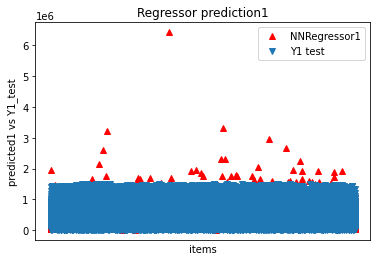

In [102]:
plt.figure()
plt.plot(prediction1, 'r^', label='NNRegressor1')
plt.plot(Y1_test, 'v', label='Y1 test')
plt.tick_params(axis='x', which='both', bottom=False, top=False,
                labelbottom=False)
plt.ylabel('predicted1 vs Y1_test')
plt.xlabel('items')
plt.legend(loc="best")
plt.title('Regressor prediction1')

plt.show()

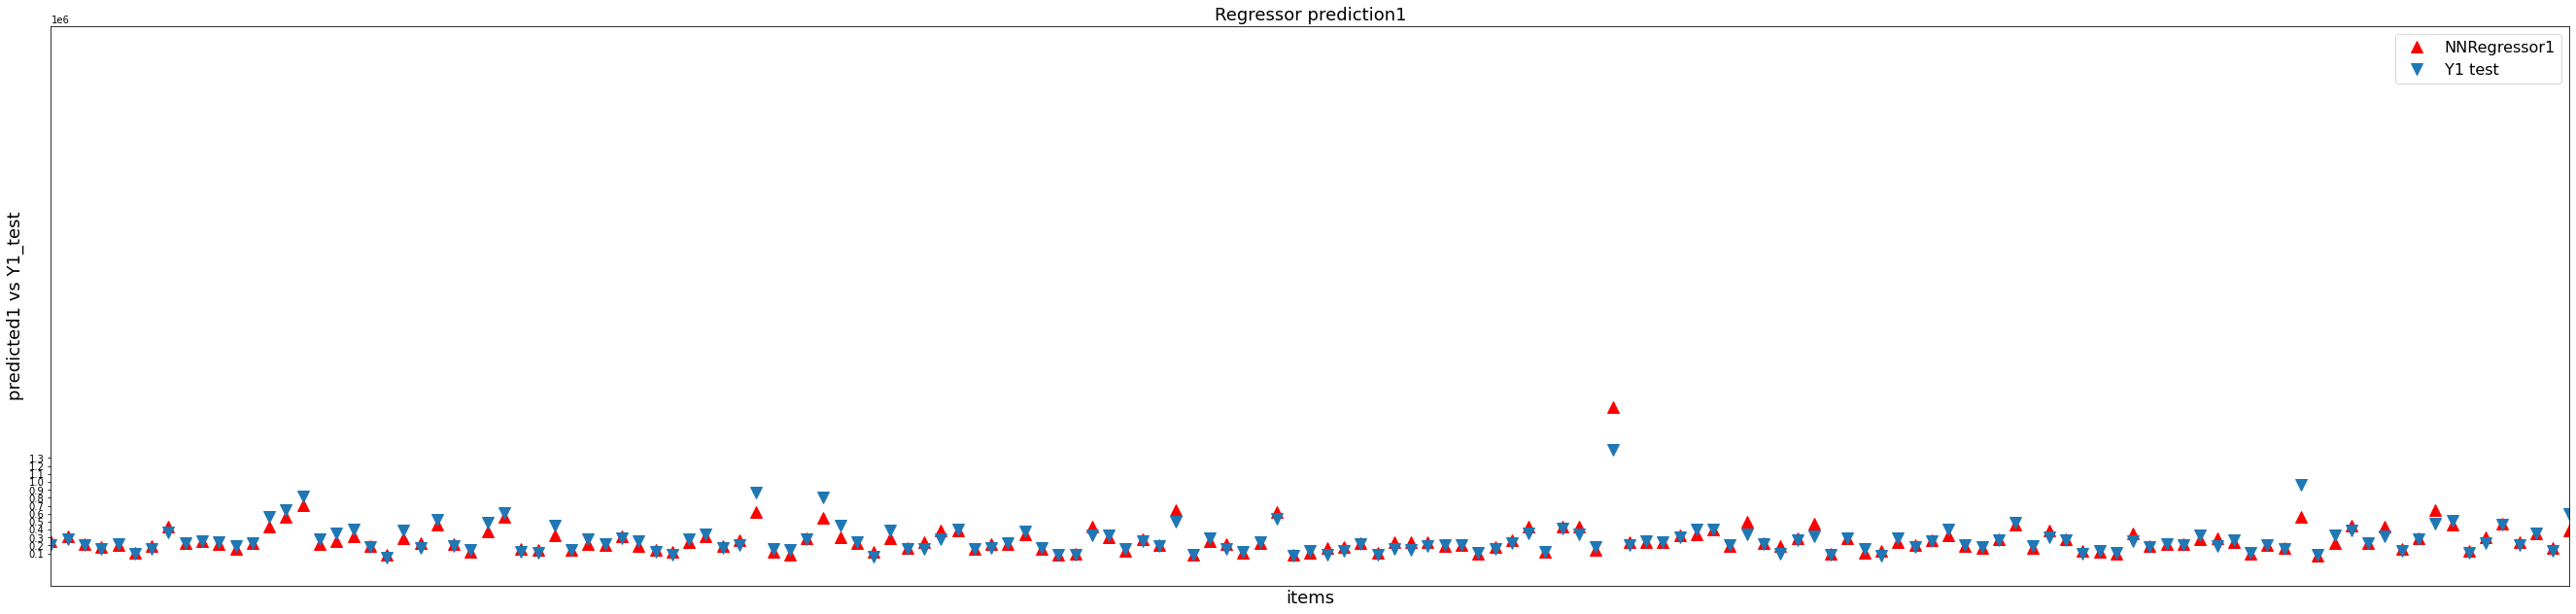

In [103]:
a= plt.figure()
axes= a.add_axes([0,0,6,2])#sequence of [left, bottom, width, height] quantities.
#axes= a.add_axes([0.2,0.2,8,8])
# adding axes
#x= np.arange(0,11)
#axes.plot(prediction, marker='*')
y = np.array([100000, 200000, 300000, 400000, 500000, 600000,700000,800000, 900000, 1000000,1100000,1200000, 1300000,1400000])
plt.yticks(np.arange(y.min(), y.max(), 100000))

axes.plot(prediction1, 'r^', label='NNRegressor1',markersize=12)
axes.plot(Y1_test, 'v', label='Y1 test',markersize=12)
axes.set_xlim([0,150])
plt.tick_params(axis='x', which='both', bottom=False, top=False,
                labelbottom=False)
plt.ylabel('predicted1 vs Y1_test', fontsize=18)
plt.xlabel('items', fontsize=18)
plt.legend(loc="best",prop={'size': 16})
plt.title('Regressor prediction1', fontsize=18)

plt.show()

In [104]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error

In [105]:
mean_squared_error1=metrics.mean_squared_error(prediction1,Y1_test)
mean_squared_error1
root_mse1_2=pow(mean_squared_error1,0.5)
root_mse1_2

73832.10011912163

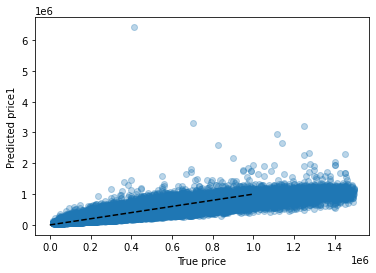

In [106]:
plt.scatter(Y1_test,prediction1,alpha=0.3)
plt.plot([0,1000000],[0,1000000],'--k')
plt.axis('tight')
plt.xlabel('True price')
plt.ylabel('Predicted price1')
plt.show()


In [107]:
mean_squared_error_validation=metrics.mean_squared_error(prediction_validation,Y_Validation)
mean_squared_error_validation
root_msev_2=pow(mean_squared_error_validation,0.5)
root_msev_2

72431.89662446248

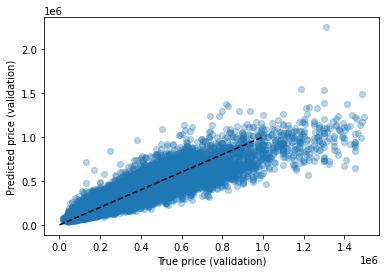

In [108]:
plt.scatter(Y_Validation,prediction_validation,alpha=0.3)
plt.plot([0,1000000],[0,1000000],'--k')
plt.axis('tight')
plt.xlabel('True price (validation)')
plt.ylabel('Predicted price (validation)')
plt.show()